# **Random Forest Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pickle import dump

In [2]:
X_train = pd.read_csv('../data/processed/train_test_madrid/Xtrain.csv')
X_test = pd.read_csv('../data/processed/train_test_madrid/Xtest.csv')

y_train = pd.read_csv('../data/processed/train_test_madrid/ytrain.csv')
y_test = pd.read_csv('../data/processed/train_test_madrid/ytest.csv')

In [3]:
X_test

,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N
0,15.666667,4,5,0,1
1,17.750000,4,2,0,1
2,19.333333,4,5,0,1
3,23.666667,4,5,0,0
4,22.916667,4,2,0,0
...,...,...,...,...,...
10782,0.154167,4,0,2,1
10783,33.583333,4,2,0,0
10784,33.041667,12,4,2,1
10785,1.333333,9,2,1,1


In [4]:
y_test

,PELIGROSIDAD_N
0,0
1,1
2,0
3,0
4,1
...,...
10782,0
10783,2
10784,0
10785,0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define el modelo Random Forest
model = RandomForestClassifier(random_state=23)

# # Define un rango de valores para los hiperparámetros que deseas ajustar
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Puedes ajustar los valores de n_estimators
#     'max_depth': [10, 20, 30],       # Puedes ajustar la profundidad máxima
#     'min_samples_split': [2, 5, 10],  # Puedes ajustar min_samples_split
#     'min_samples_leaf': [1, 2, 4],    # Puedes ajustar min_samples_leaf
#     'max_features': ['sqrt', 'log2'],  # Puedes ajustar max_features
# }

param_grid = {
    'n_estimators': [100, 200],        # Reducir valores para n_estimators
    'max_depth': [10, 20],             # Reducir valores para max_depth
    'min_samples_split': [2, 5],       # Reducir valores para min_samples_split
    'min_samples_leaf': [1, 2],        # Reducir valores para min_samples_leaf
    'max_features': ['sqrt', 'log2'],  # Mantener valores para max_features
}

# Define el objeto GridSearchCV con el modelo, el espacio de búsqueda y la métrica de evaluación
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Ajusta el modelo utilizando la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtiene el mejor modelo
best_model = grid_search.best_estimator_

# Realiza predicciones con el mejor modelo en los datos de prueba
y_pred = best_model.predict(X_test)

y_pred

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


array([0, 1, 0, ..., 0, 0, 0])

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


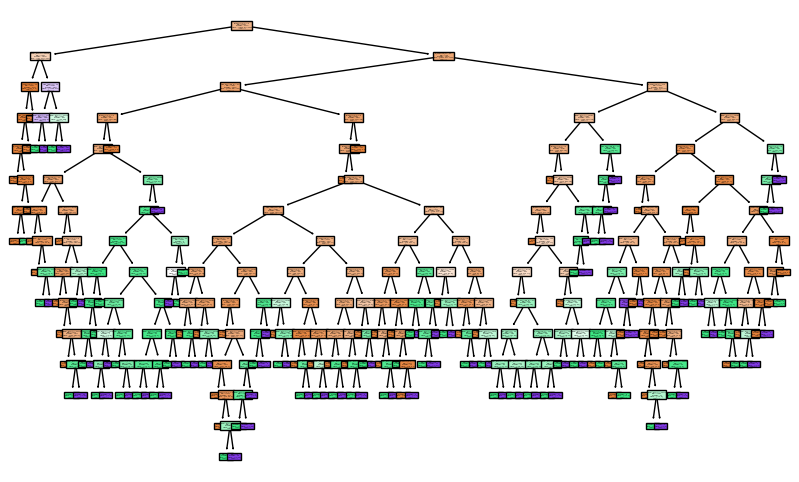

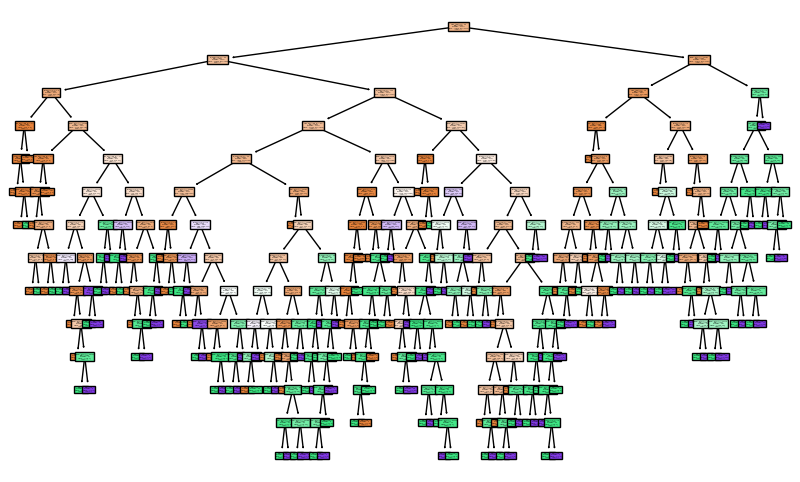

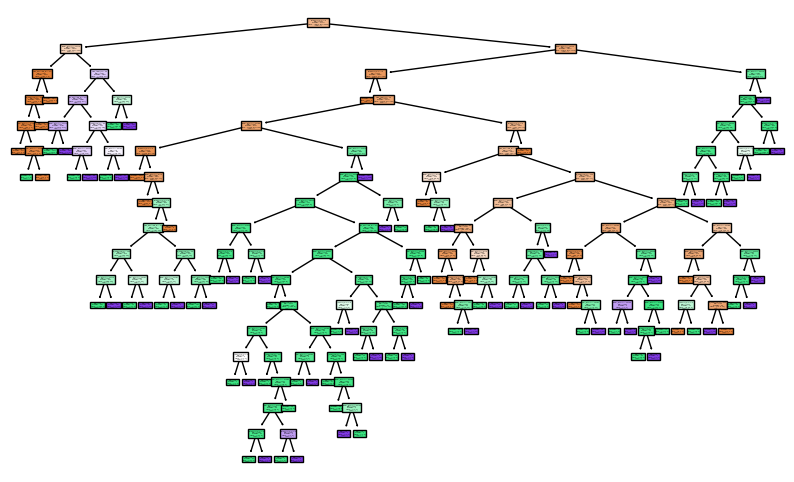

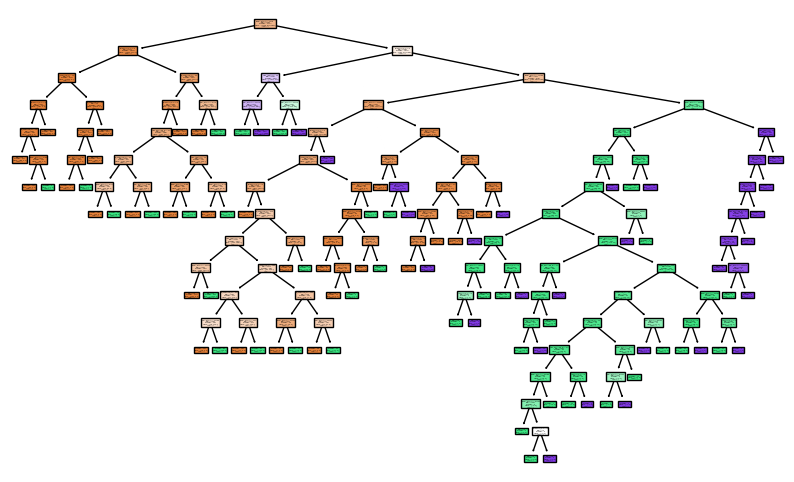

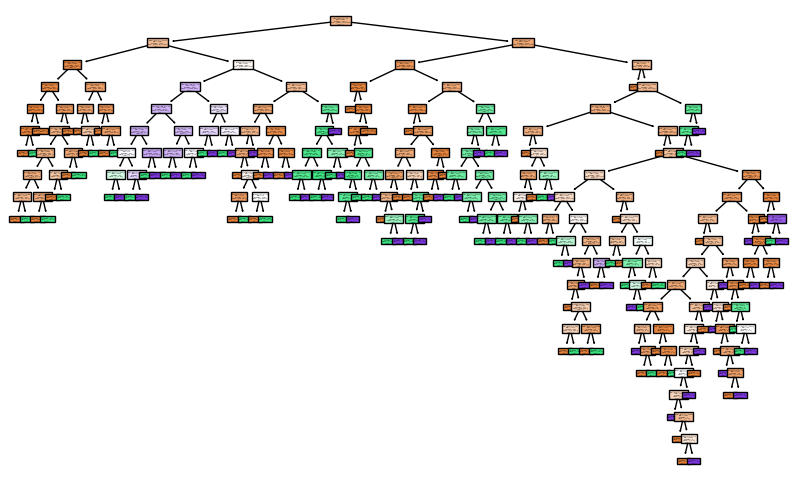

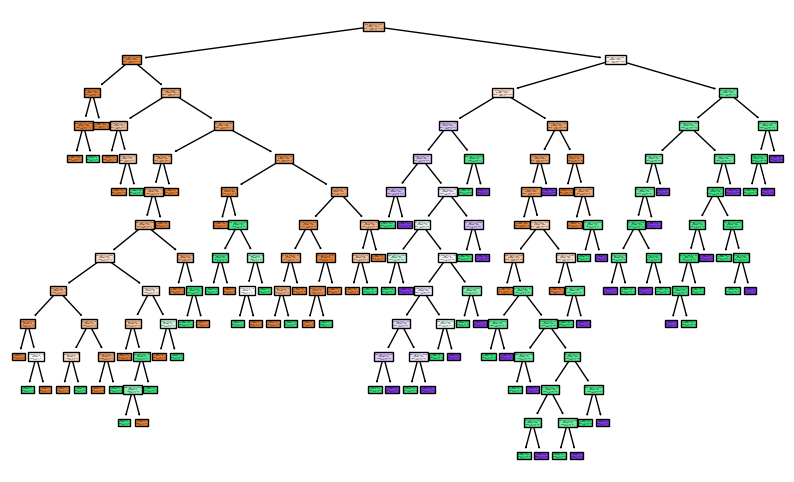

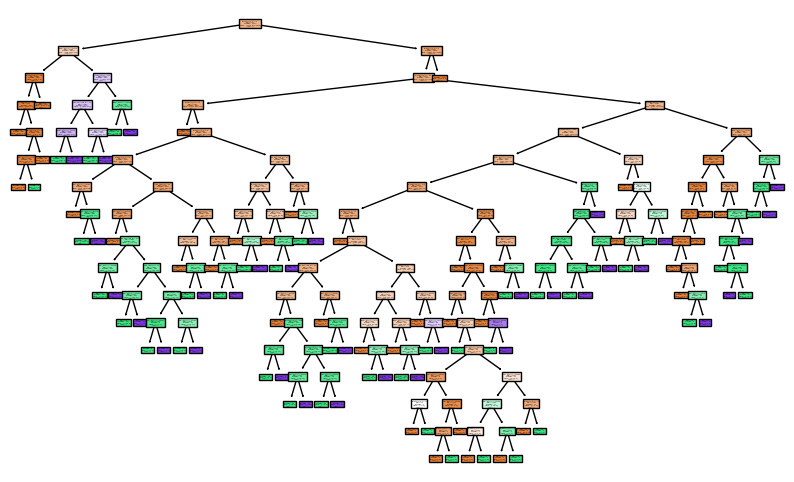

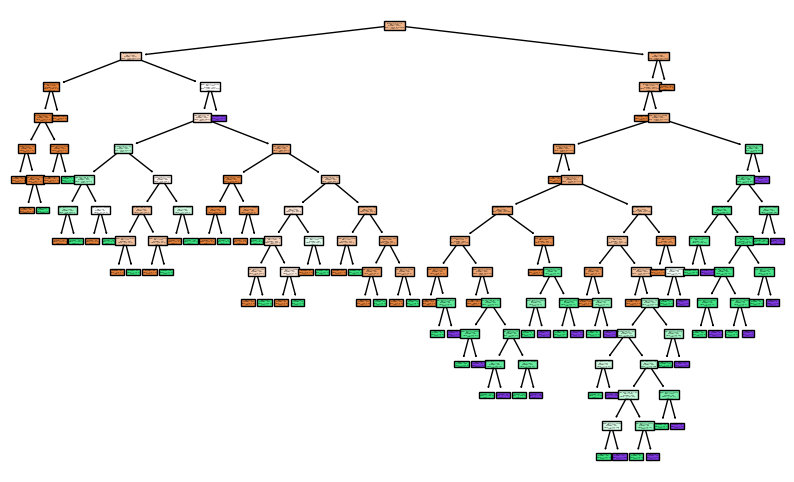

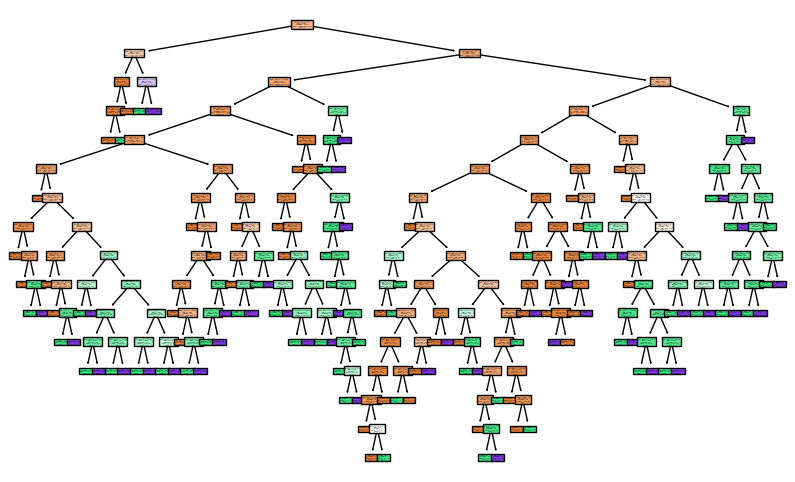

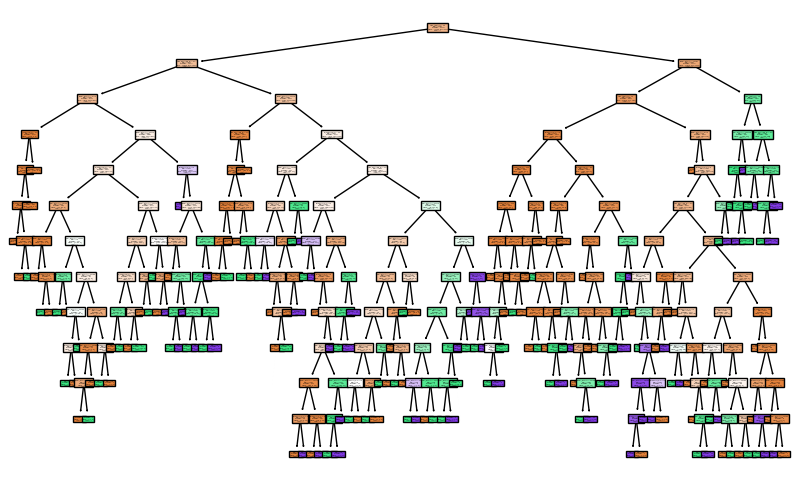

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Crear un modelo de Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=23)

# Ajustar el modelo a tus datos de entrenamiento
model.fit(X_train, y_train)

# Acceder a los árboles individuales y visualizarlos
for i, tree_estimator in enumerate(model.estimators_):
    plt.figure(figsize=(10, 6))
    plt.title(f'Árbol {i+1}')
    tree.plot_tree(tree_estimator, feature_names=X_train.columns, class_names=['0', '1', '2'], filled=True)
    plt.show()


In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [8]:
dump(model, open("../models/RandomForestMadrid_23_params.pk", "wb"))

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[7263    0    0]
 [   0 2065    0]
 [   0    0 1459]]



No hay falsos positivos ni falsos negativos, ya que todos los valores fuera de la diagonal principal son ceros.

In [11]:
# Informe de clasificación
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7263
           1       1.00      1.00      1.00      2065
           2       1.00      1.00      1.00      1459

    accuracy                           1.00     10787
   macro avg       1.00      1.00      1.00     10787
weighted avg       1.00      1.00      1.00     10787



In [12]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

madrid_df = pd.read_csv('../data/processed/factorize_csv/sin_LL.csv')
X = madrid_df.drop('PELIGROSIDAD_N', axis =1)
y = madrid_df['PELIGROSIDAD_N']


model = RandomForestClassifier(n_estimators=100) 
kf = KFold(n_splits=5, shuffle=True, random_state=23) 
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')


In [13]:
print("Precisión promedio:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())


Precisión promedio: 0.9999072872241795
Desviación estándar de la precisión: 0.00011727341591574633


Una precisión promedio 99.99% junto con una desviación estándar extremadamente baja indica que el modelo tiene un rendimiento excelente en la validación cruzada. La precisión promedio cercana a 1.00 sugiere que el modelo es capaz de hacer predicciones casi perfectas en los conjuntos de prueba de cada pliegue de la validación cruzada.

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

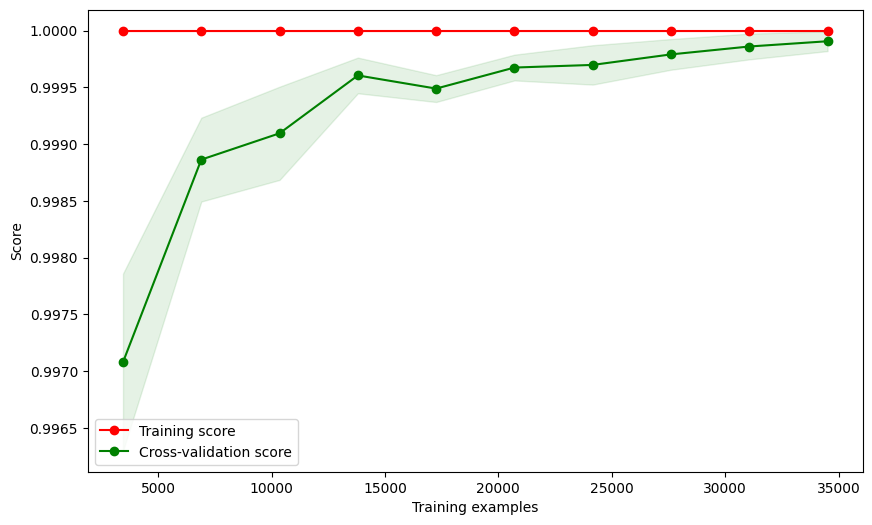

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


La línea roja lineal desde 1.00 en una curva de aprendizaje indica que el modelo está sobreajustado a los datos de entrenamiento. Esto significa que el modelo se adapta perfectamente a los datos de entrenamiento, alcanzando una precisión del 100%, pero no generaliza bien a nuevos datos.